In [13]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard


In [5]:
#importing data from csv files
train_df = pd.read_csv(r'data/fashion-mnist_train.csv')
test_df = pd.read_csv(r'data/fashion-mnist_test.csv')

train_df.head() # checking if import is successful

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# converting data frames into numpy arrays
train_data = np.array(train_df, dtype = 'float32')
test_data = np.array(test_df, dtype = 'float32' )

x_train = train_data[:,1:] / 255 # all rows 1: starts from column 1
y_train = train_data[:,0]

x_test = test_data[:,1:] / 255 # divide by 255 scales out pixel to 0 -1
y_test = test_data[:,0]

In [7]:
# test size is the percent you want to split train and test 0.2 is 20% for validation
# random_state: defines how to split data  can be left to null
x_train, x_validate, y_train, y_validate = train_test_split(
    x_train, y_train, test_size = 0.2, random_state = 12345
)

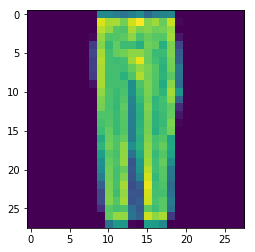

In [10]:
image = x_train[500,:].reshape(28,28)
plt.imshow(image)
plt.show()

Create the CNN
 - define the model
 - complie the model
 - fit the model

In [47]:
im_rows = 28
im_cols = 28
batch_size = 514
im_shape = (im_rows, im_cols, 1) # 1 is for adding 3D

# print(x_train)
# print(type(im_shape))
# print(x_train.shape)
# print(x_train.shape[0])
# print(*im_shape) # unpacks tuple

x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_validate = x_validate.reshape(x_validate.shape[0], *im_shape)

# print('x_train shape' , x_train.shape)
# print(x_train)

print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))
print('x_validate shape: {}'.format(x_validate.shape))

x_train shape: (48000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
x_validate shape: (12000, 28, 28, 1)


In [50]:
'''
    define a model: 
        sequential model
    pass layer: 
        1. Conv2d(dim of output, matrix size of kernel, activation function, dim of input)
        2. MaxPooling2D(pool size) : downsize image for this example instead of 28 it is going to be 14
        3. Droupout: randomly dropout connections in next layer
        
        4. Flatten: flatten out all the layers
        5. Dense layer for input
        6. Dense layer for output
        
'''
cnn_model = Sequential([
    Conv2D(filters = 32, kernel_size=3, activation='relu', input_shape=im_shape),
    MaxPooling2D(pool_size = 2),
    Dropout(0.2),

    Flatten(),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

In [56]:
'''
    save to view later
'''
tensorboard = TensorBoard(
    log_dir = r'logs\{}'.format('cnn_1layer'),
    write_graph = True,
    write_grads = True,
    histogram_freq = 1,
    write_images = True
)

'''
    compile the model
    lr: learning rate
    metrics: 
'''
cnn_model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = Adam(lr=0.001),
    metrics = ['accuracy']
)

In [59]:
'''
    fit or train the model
'''

cnn_model.fit(
    x_train, y_train, batch_size = batch_size,
    epochs = 10, verbose = 1,
    validation_data = (x_validate, y_validate),
    callbacks = [tensorboard]
)



Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 44s 910us/step - loss: 0.2815 - acc: 0.8998 - val_loss: 0.2820 - val_acc: 0.9013
Epoch 2/10
48000/48000 [==============================] - 43s 894us/step - loss: 0.2713 - acc: 0.9038 - val_loss: 0.2876 - val_acc: 0.8968
Epoch 3/10
48000/48000 [==============================] - 42s 868us/step - loss: 0.2685 - acc: 0.9044 - val_loss: 0.2815 - val_acc: 0.9013
Epoch 4/10
48000/48000 [==============================] - 42s 873us/step - loss: 0.2597 - acc: 0.9069 - val_loss: 0.2711 - val_acc: 0.9043
Epoch 5/10
48000/48000 [==============================] - 42s 879us/step - loss: 0.2581 - acc: 0.9081 - val_loss: 0.2695 - val_acc: 0.9023
Epoch 6/10
48000/48000 [==============================] - 42s 869us/step - loss: 0.2515 - acc: 0.9101 - val_loss: 0.2852 - val_acc: 0.8978
Epoch 7/10
48000/48000 [==============================] - 42s 873us/step - loss: 0.2467 - acc: 0.9114 - val_loss: 0.

In [55]:
score = cnn_model.evaluate(x_test, y_test, verbose = 0)

print('test loss: {:.4f}'.format(score[0]))
print('test acc: {:.4f}'.format(score[1]))

test loss: 0.2819
test acc: 0.8999
